# Capstone Project

In [77]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 0) #To display entire text content of a column
import matplotlib.pyplot as plt
import seaborn as sns

# For web scraping
from selenium import webdriver
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions
# from selenium.webdriver.common.by import By
# import time

import twint
import nest_asyncio
import csv

import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords 
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rachelchen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachelchen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachelchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**We have complete our ideal raw data.**

In [30]:
df = pd.read_csv('/Users/rachelchen/Desktop/BrainStation/Capstone/Twitter Sentiment/new0425.csv')

In [31]:
df.head()

,id,datetime,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,coordinates,polarity,subjectivity,positive,neutral,negative,sentiment
0,1385745271376711685,2021-04-23 19:59:53-04:00,437549659,craig_swenson,markhigbee byusam chjesuschrist too late at this point we have known longterm effects of covid19 weighed against potential unknowns of a vaccine that has passed similar safety protocols as other vaccines just in a shorter timescale more a commentary on what is achievable when resources are not limited,1,0,0,[],"39.95233,-75.16379,200km",0.018452,0.502976,0.139,0.861,0.000,positive
1,1385745252435173377,2021-04-23 19:59:48-04:00,1247580609708359686,tsince1985,my body my choice sure dissolved quickly thanks to covid19 the uc amp csu university systems in ca are requiring proof of covid19 vaccination to return to inperson learning well you had a good run institutions of higher learning theres always chapter 11 bankruptcy,0,0,0,[],"37.33939,-121.89496,200km",0.412500,0.547222,0.207,0.793,0.000,positive
2,1385745233258770433,2021-04-23 19:59:44-04:00,195878438,mcfarlandclinic,if youve been waiting to get your covid vaccine this is your shot all iowans 16 and older can get the vaccine now and mcfarland clinic and others have the vaccine readily available learn more and schedule online at,0,1,2,[],"29.76328,-95.36327,200km",0.355556,0.411111,0.000,1.000,0.000,neutral
3,1385745114107195395,2021-04-23 19:59:15-04:00,3962090297,bonheurchasse,drove from the suburbs to the north side of chicago to the south west side of chicago and back to take my daughter for her covid vaccine total trip time 5 hours worth every minute,1,0,6,[],"41.85003,-87.65005,200km",0.100000,0.283333,0.054,0.946,0.000,positive
4,1385745098357489668,2021-04-23 19:59:12-04:00,135263424,meg_michael_,dfisman life circumstances means that those most at risk of adverse covid outcomes also be put at additional risk with az vaccination save it for them because we can all wait for the better vaccines just such fucking shit messaging on your part awful shameful,1,1,1,[],"45.41117,-75.69812,200km",-0.040000,0.660000,0.101,0.612,0.287,negative


In [32]:
df.tail()

,id,datetime,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,coordinates,polarity,subjectivity,positive,neutral,negative,sentiment
145480,1220368228582449152,2020-01-23 10:30:33-05:00,3343098585,drfelicegersh,china coronavirus is spreadingwhat precautions is the us taking and is there a vaccine we all are hopingto learn more about this virus,0,0,4,['coronavirus'],"34.05223,-118.24368,200km",0.500000,0.500000,0.000,1.000,0.000,neutral
145481,1220027260389904384,2020-01-22 11:55:40-05:00,66777764,queencarmel,people dont wanna get their kids vaccinated meanwhile foreigners are bringing measles and the coronavirus to the us bad parenting protect your kids dummies,0,0,0,[],"34.05223,-118.24368,200km",-0.700000,0.666667,0.093,0.783,0.125,negative
145482,1219837530113097729,2020-01-21 23:21:45-05:00,907091168,ashleyjoetta,in more important news i got my flu shot today during my head injury check up but whens the coronavirus vaccination gonna be ready the first us case is of course in wa up the road from us,0,0,3,[],"49.24966,-123.11934,200km",0.337500,0.583333,0.116,0.795,0.089,positive
145483,1219828839670599680,2020-01-21 22:47:13-05:00,1175966901312376832,jojomewa1,ixowen me purposely contracting the deadly chinese coronavirus from you tn as a vaccine against future deadly coronaviruses,0,0,0,[],"40.71427,-74.00597,200km",-0.066667,0.175000,0.000,1.000,0.000,neutral
145484,1219769485428695042,2020-01-21 18:51:22-05:00,24060313,ndconnell,peterhotez universal coronavirus vaccine,0,0,0,[],"39.95233,-75.16379,200km",0.000000,0.000000,0.000,1.000,0.000,neutral


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145485 entries, 0 to 145484
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              145485 non-null  int64  
 1   datetime        145485 non-null  object 
 2   user_id         145485 non-null  int64  
 3   username        145485 non-null  object 
 4   tweet           145473 non-null  object 
 5   replies_count   145485 non-null  int64  
 6   retweets_count  145485 non-null  int64  
 7   likes_count     145485 non-null  int64  
 8   hashtags        145485 non-null  object 
 9   coordinates     145485 non-null  object 
 10  polarity        145485 non-null  float64
 11  subjectivity    145485 non-null  float64
 12  positive        145485 non-null  float64
 13  neutral         145485 non-null  float64
 14  negative        145485 non-null  float64
 15  sentiment       145485 non-null  object 
dtypes: float64(5), int64(5), object(6)
memory usage: 17.8+ M

### Distribution 

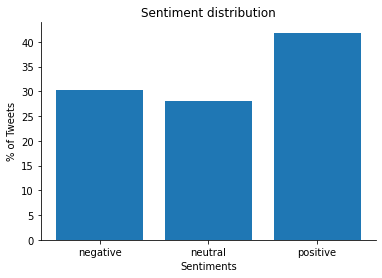

Class imbalance: [0.3  0.28 0.42]


In [34]:
values, counts = np.unique(df['sentiment'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100)
plt.xlabel('Sentiments')
plt.ylabel('% of Tweets')
sns.despine()
plt.title('Sentiment distribution')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

**Let's put it into a nice pie chat**

AttributeError: module 'matplotlib.pyplot' has no attribute 'ledgend'

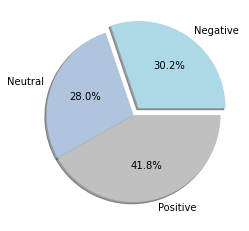

In [40]:
plt.pie(normalized_counts,
        labels =  ['Negative', 'Neutral', 'Positive'],
        autopct='%1.1f%%',
        shadow = True,
        colors = ['lightblue', 'lightsteelblue', 'silver'],
        explode = (0.1, 0, 0))
plt.ledgend()
plt.title('Distribution of Sentiment', color = 'grey')

#plt.show()
plt.savefig('/Users/rachelchen/Desktop/BrainStation/Capstone/Twitter Sentiment/Distribution of Sentiment.png')

### World Cloud

In [41]:
df_neg = df[df['sentiment']=='negative']
df_pos = df[df['sentiment']=='positive']

In [42]:
df_neg.head(10)

,id,datetime,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,coordinates,polarity,subjectivity,positive,neutral,negative,sentiment
4,1385745098357489668,2021-04-23 19:59:12-04:00,135263424,meg_michael_,dfisman life circumstances means that those most at risk of adverse covid outcomes also be put at additional risk with az vaccination save it for them because we can all wait for the better vaccines just such fucking shit messaging on your part awful shameful,1,1,1,[],"45.41117,-75.69812,200km",-0.040000,0.660000,0.101,0.612,0.287,negative
5,1385745078954586112,2021-04-23 19:59:07-04:00,1097235870749405185,rebvlev,too bad the covid vaccine wont stop me from being lovesick,0,0,1,[],"49.24966,-123.11934,200km",-0.700000,0.666667,0.131,0.626,0.243,negative
6,1385745076329107466,2021-04-23 19:59:06-04:00,1374006679533150208,mo71534409,vaccine hesitancy is natural the reality is there will be adverse vaccine effects in some people just as there will be adverse effects on individuals amp on our communities from covid illness amp deaths i oppose mandatory vaccination i support cautious amp informed decision making,0,0,0,[],"41.85003,-87.65005,200km",0.100000,0.400000,0.124,0.667,0.210,negative
13,1385744858061623297,2021-04-23 19:58:14-04:00,1176420138,emilydeboom,joyannreid 100 choose a vaccinated and covid negative flight and i would happily pay more for that flight,0,0,0,[],"30.33218,-81.65565,200km",0.333333,0.633333,0.166,0.599,0.235,negative
14,1385744833151528960,2021-04-23 19:58:08-04:00,240976615,smarti018,kiroradio cdcgov why would i get a vaccine for something less deadly than the flu and i can still be contagious this isnt going away they will push the covid vaccine the same way they have yearly flu vaccines eat your vegetables exercise and get outside to get some vitamin d yall be fine,0,0,3,[],"49.24966,-123.11934,200km",0.010000,0.228333,0.071,0.795,0.134,negative
20,1385744783516311553,2021-04-23 19:57:56-04:00,299914067,litterboxx,will someone ask sen ron johnson if he has received the covid19 vaccine there are health professionals that know the truth if he denies receiving his shots call out the liars,0,0,0,[],"33.44838,-112.07404,200km",0.000000,0.000000,0.063,0.767,0.170,negative
22,1385744725559308296,2021-04-23 19:57:43-04:00,18218403,sptaillefer,bc cancels vancouver country clubs vaccine clinic for members province called clinic unacceptable pharmacy involved will no longer be administering covid19 vaccines cbc news,0,0,0,[],"49.24966,-123.11934,200km",0.000000,0.000000,0.000,0.747,0.253,negative
25,1385744702863970307,2021-04-23 19:57:37-04:00,3317173928,aidantrader28,usfda cdcgov any update on the eua for 1215 year olds on pfizers vaccine demand is dying down rapidly and kids are getting impatient waiting when they understand the vaccine is safe and very effective new strains also makes younger kids more vulnerable to illness from covid19,1,0,11,[],"40.71427,-74.00597,200km",0.132601,0.517929,0.109,0.694,0.196,negative
32,1385744463725793280,2021-04-23 19:56:40-04:00,14988627,micar,7hrs post astrazeneca covid vaccination and im sleepy and my arm hurts and i just want to curl up under a blanket,0,0,4,[],"43.70011,-79.4163,200km",0.000000,0.000000,0.058,0.804,0.138,negative
33,1385744435430842369,2021-04-23 19:56:33-04:00,1363011323211120640,jamesha12466496,having cancer i would never walk in this hospital knowing employees refuse covid vaccine with thats insane how dare you people rat wing wackos yes rats,0,2,1,[],"34.05223,-118.24368,200km",-1.000000,1.000000,0.082,0.636,0.282,negative


In [43]:
df_pos.head(10)

,id,datetime,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,coordinates,polarity,subjectivity,positive,neutral,negative,sentiment
0,1385745271376711685,2021-04-23 19:59:53-04:00,437549659,craig_swenson,markhigbee byusam chjesuschrist too late at this point we have known longterm effects of covid19 weighed against potential unknowns of a vaccine that has passed similar safety protocols as other vaccines just in a shorter timescale more a commentary on what is achievable when resources are not limited,1,0,0,[],"39.95233,-75.16379,200km",0.018452,0.502976,0.139,0.861,0.000,positive
1,1385745252435173377,2021-04-23 19:59:48-04:00,1247580609708359686,tsince1985,my body my choice sure dissolved quickly thanks to covid19 the uc amp csu university systems in ca are requiring proof of covid19 vaccination to return to inperson learning well you had a good run institutions of higher learning theres always chapter 11 bankruptcy,0,0,0,[],"37.33939,-121.89496,200km",0.412500,0.547222,0.207,0.793,0.000,positive
3,1385745114107195395,2021-04-23 19:59:15-04:00,3962090297,bonheurchasse,drove from the suburbs to the north side of chicago to the south west side of chicago and back to take my daughter for her covid vaccine total trip time 5 hours worth every minute,1,0,6,[],"41.85003,-87.65005,200km",0.100000,0.283333,0.054,0.946,0.000,positive
9,1385744937140948992,2021-04-23 19:58:33-04:00,237481204,_ericcarr,vaccination is the best tool to defeat this pandemic access shouldnt be a barrier anyone can find the covid19 vaccine near them by visiting vaccinefinder wecandothis thisisourshot vacunateya,0,4,4,"['wecandothis', 'thisisourshot', 'vacunateya']","30.33218,-81.65565,200km",0.550000,0.350000,0.171,0.737,0.092,positive
10,1385744936675381248,2021-04-23 19:58:33-04:00,54301769,fanoonman,twitter trending news vaccination helps reduce the transmission of covid19 according to studies and health experts obviously studies and health experts is plural enough not to be citing any new data or claim and this does say helps not reduces so is this news,0,0,1,[],"33.44838,-112.07404,200km",0.045455,0.484848,0.110,0.890,0.000,positive
15,1385744831255912449,2021-04-23 19:58:08-04:00,2330750848,aumfamilyoffice,employers may claim tax credit for providing covid19 vaccination paid leave with qualifications,0,0,0,[],"40.71427,-74.00597,200km",0.000000,0.000000,0.176,0.743,0.081,positive
17,1385744813748805637,2021-04-23 19:58:04-04:00,3025872021,insatiablevine,covid vaccine gonna break up a lot of couples lol,1,0,4,[],"39.96118,-82.99879,200km",0.800000,0.700000,0.259,0.741,0.000,positive
18,1385744801253965828,2021-04-23 19:58:01-04:00,1533576234,berthagarcia5,agedependent immune response to the biontechpfizer bnt162b2 covid19 vaccination medrxiv get those second doses at least for the 80 please vickyrobinbaum cdavidnaylor,0,0,2,[],"43.70011,-79.4163,200km",-0.150000,0.200000,0.184,0.816,0.000,positive
19,1385744793280475139,2021-04-23 19:57:59-04:00,145337600,samoverthere,heres some good vaccine news and its not about covid,0,0,3,[],"32.78306,-96.80667,200km",0.700000,0.600000,0.244,0.756,0.000,positive
21,1385744730101743618,2021-04-23 19:57:44-04:00,46642961,trekfanboy,joyannreid i am 1000 behind vaccine passport flights concerts sporting events restaurants happy hours etc the less im around sciencedenying antivaxxers the better keep your covid cooties to yourself thank you very much,0,0,0,[],"33.44838,-112.07404,200km",0.198667,0.505333,0.239,0.761,0.000,positive


https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

1. Tokenization

In [44]:
tokenized_tweet = df_neg['tweet'].apply(lambda x: x.split())
tokenized_tweet

4         [dfisman, life, circumstances, means, that, those, most, at, risk, of, adverse, covid, outcomes, also, be, put, at, additional, risk, with, az, vaccination, save, it, for, them, because, we, can, all, wait, for, the, better, vaccines, just, such, fucking, shit, messaging, on, your, part, awful, shameful]                                      
5         [too, bad, the, covid, vaccine, wont, stop, me, from, being, lovesick]                                                                                                                                                                                                                                                                                 
6         [vaccine, hesitancy, is, natural, the, reality, is, there, will, be, adverse, vaccine, effects, in, some, people, just, as, there, will, be, adverse, effects, on, individuals, amp, on, our, communities, from, covid, illness, amp, deaths, i, oppose, mandatory, vaccination, i, suppor

2. Removing stop words

In [45]:
stop_words = stopwords.words('english')

tokenized_words_list = []

for i in range(0, len(tokenized_tweet)):
    tweet = tokenized_tweet.iloc[i]
    tokenized_words_list.append([word for word in tweet if word not in stop_words])

tokenized_words_list

[['dfisman',
  'life',
  'circumstances',
  'means',
  'risk',
  'adverse',
  'covid',
  'outcomes',
  'also',
  'put',
  'additional',
  'risk',
  'az',
  'vaccination',
  'save',
  'wait',
  'better',
  'vaccines',
  'fucking',
  'shit',
  'messaging',
  'part',
  'awful',
  'shameful'],
 ['bad', 'covid', 'vaccine', 'wont', 'stop', 'lovesick'],
 ['vaccine',
  'hesitancy',
  'natural',
  'reality',
  'adverse',
  'vaccine',
  'effects',
  'people',
  'adverse',
  'effects',
  'individuals',
  'amp',
  'communities',
  'covid',
  'illness',
  'amp',
  'deaths',
  'oppose',
  'mandatory',
  'vaccination',
  'support',
  'cautious',
  'amp',
  'informed',
  'decision',
  'making'],
 ['joyannreid',
  '100',
  'choose',
  'vaccinated',
  'covid',
  'negative',
  'flight',
  'would',
  'happily',
  'pay',
  'flight'],
 ['kiroradio',
  'cdcgov',
  'would',
  'get',
  'vaccine',
  'something',
  'less',
  'deadly',
  'flu',
  'still',
  'contagious',
  'isnt',
  'going',
  'away',
  'push',
 

2. Stemming

In [46]:
stemmer = PorterStemmer()
stemma_words_list = []

for i in range(0, len(tokenized_words_list)):
    tweet = tokenized_words_list[i]
    stemma_words_list.append([stemmer.stem(word) for word in tweet])

stemma_words_list

[['dfisman',
  'life',
  'circumst',
  'mean',
  'risk',
  'advers',
  'covid',
  'outcom',
  'also',
  'put',
  'addit',
  'risk',
  'az',
  'vaccin',
  'save',
  'wait',
  'better',
  'vaccin',
  'fuck',
  'shit',
  'messag',
  'part',
  'aw',
  'shame'],
 ['bad', 'covid', 'vaccin', 'wont', 'stop', 'lovesick'],
 ['vaccin',
  'hesit',
  'natur',
  'realiti',
  'advers',
  'vaccin',
  'effect',
  'peopl',
  'advers',
  'effect',
  'individu',
  'amp',
  'commun',
  'covid',
  'ill',
  'amp',
  'death',
  'oppos',
  'mandatori',
  'vaccin',
  'support',
  'cautiou',
  'amp',
  'inform',
  'decis',
  'make'],
 ['joyannreid',
  '100',
  'choos',
  'vaccin',
  'covid',
  'neg',
  'flight',
  'would',
  'happili',
  'pay',
  'flight'],
 ['kiroradio',
  'cdcgov',
  'would',
  'get',
  'vaccin',
  'someth',
  'less',
  'deadli',
  'flu',
  'still',
  'contagi',
  'isnt',
  'go',
  'away',
  'push',
  'covid',
  'vaccin',
  'way',
  'yearli',
  'flu',
  'vaccin',
  'eat',
  'veget',
  'exercis

3. Lemmatization

In [47]:
# lemmatizer = WordNetLemmatizer()

# lemma_words_list = []

# for i in range(0, len(tokenized_words_list)):
#     tweet = tokenized_words_list[i]
#     lemma_words_list.append([lemmatizer.lemmatize(word) for word in tweet])

# lemma_words_list

In [48]:
# for i in range(len(lemma_words_list)):
#     lemma_words_list[i] = ' '.join(lemma_words_list[i])
    
# lemma_words_list

In [49]:
for i in range(len(stemma_words_list)):
    stemma_words_list[i] = ' '.join(stemma_words_list[i])
    
stemma_words_list

['dfisman life circumst mean risk advers covid outcom also put addit risk az vaccin save wait better vaccin fuck shit messag part aw shame',
 'bad covid vaccin wont stop lovesick',
 'vaccin hesit natur realiti advers vaccin effect peopl advers effect individu amp commun covid ill amp death oppos mandatori vaccin support cautiou amp inform decis make',
 'joyannreid 100 choos vaccin covid neg flight would happili pay flight',
 'kiroradio cdcgov would get vaccin someth less deadli flu still contagi isnt go away push covid vaccin way yearli flu vaccin eat veget exercis get outsid get vitamin yall fine',
 'someon ask sen ron johnson receiv covid19 vaccin health profession know truth deni receiv shot call liar',
 'bc cancel vancouv countri club vaccin clinic member provinc call clinic unaccept pharmaci involv longer administ covid19 vaccin cbc news',
 'usfda cdcgov updat eua 1215 year old pfizer vaccin demand die rapidli kid get impati wait understand vaccin safe effect new strain also make 

In [50]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

/Users/rachelchen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words')

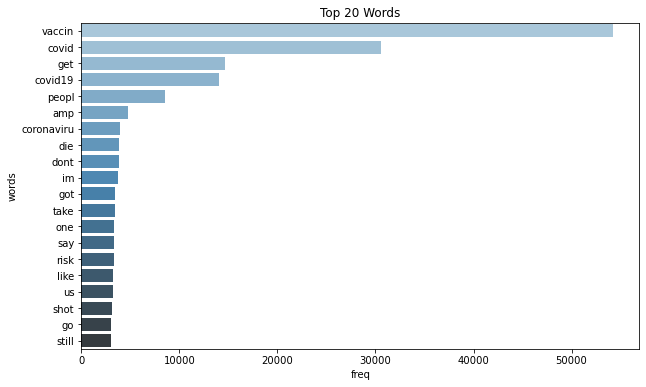

In [51]:
str = ' '.join(stemma_words_list)
words = word_count(str)
words_freq = pd.DataFrame(words.items())
words_freq.columns=['words','freq']
words_freq=words_freq.sort_values(by='freq',ascending=False)
top20 = words_freq.iloc[0:20]
top20
plt.figure(figsize=(10,6))
sns.barplot("freq","words", data=top20, palette="Blues_d").set_title("Top 20 Words")

In [52]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    stopwords.update(['vaccin', 'covid19', 'coronaviru', 'virus', 'covid'])
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        #random_state=21,
        #colormap='jet',
        max_words=300,
        min_word_length = 3,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

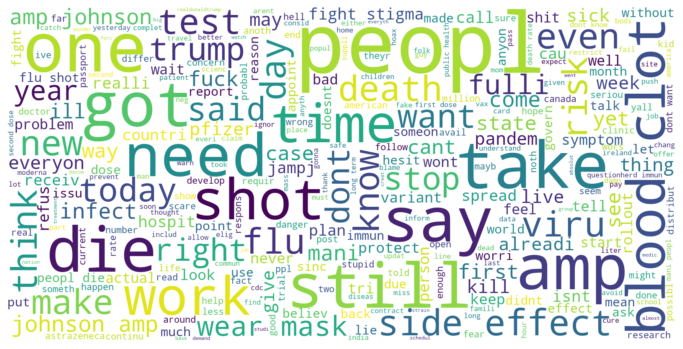

In [53]:
word_cloud(stemma_words_list)

**Repeat for Positive Words**

In [54]:
tokenized_tweet = df_pos['tweet'].apply(lambda x: x.split())

In [127]:
stop_words = stopwords.words('english')

tokenized_words_list = []

for i in range(0, len(tokenized_tweet)):
    tweet = tokenized_tweet.iloc[i]
    tokenized_words_list.append([word for word in tweet if word not in stop_words])

In [128]:
stemmer = PorterStemmer()
stemma_words_list = []

for i in range(0, len(tokenized_words_list)):
    tweet = tokenized_words_list[i]
    stemma_words_list.append([stemmer.stem(word) for word in tweet])

In [129]:
for i in range(len(stemma_words_list)):
    stemma_words_list[i] = ' '.join(stemma_words_list[i])
    
stemma_words_list

['get fulli vaccinatedamp want full send everi singl show appear town send help bc im readi like take money wanna rave miss mani good show bc covid im somewhat protect im readi',
 'help public hous resid staff protect other offer covid19 vaccin clinic today robert famili develop center urgent care volunt health profession well back 2nd vaccin two week',
 'top biden covid offici discuss vaccin rollout hous jampj shot paus',
 '0458 pm 46 04152021 select simm park pico care moderna dose 4152021 16614 clark ave bellflow ca 90706 usa myturn buggi may avail',
 'safe effect free covid19 vaccin safe effect 100 free resid california 58 counti read learn vaccin one power tool end pandem',
 'lemm get straight yall arent get test yall arent get vaccin yet summer street call name covid vibe summer got',
 'help public hous resid staff protect other offer covid19 vaccin clinic today robert famili develop center urgent care volunt health profession well back 2nd vaccin two week',
 'im sleep know im us

/Users/rachelchen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Words')

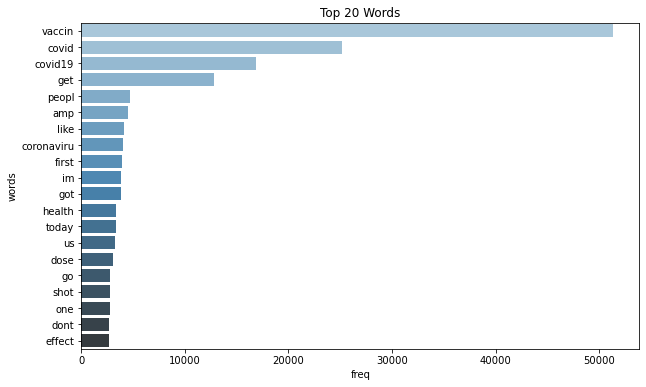

In [130]:
str = ' '.join(stemma_words_list)
words = word_count(str)
words_freq = pd.DataFrame(words.items())
words_freq.columns=['words','freq']
words_freq=words_freq.sort_values(by='freq',ascending=False)
top20 = words_freq.iloc[0:20]
top20
plt.figure(figsize=(10,6))
sns.barplot("freq","words", data=top20, palette="Blues_d").set_title("Top 20 Words")

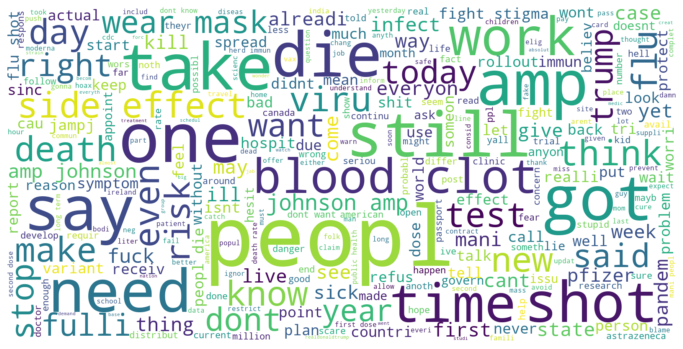

In [55]:
word_cloud(stemma_words_list)
plt.savefig('/Users/rachelchen/Desktop/BrainStation/Capstone/Twitter Sentiment/negwords.png')

### Number of tweets change over time

### Polarity/Subjective change over time

In [137]:
df.head(1)

,id,datetime,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,coordinates,polarity,subjectivity,positive,neutral,negative,sentiment
0,1382483724625874944,2021-04-14 19:59:39-04:00,612206992,riddimbaby_,not me about to get fully vaccinatedamp wanting to full send to every single show that appears in my town send help bc im just ready to be like take all my money i just wanna rave i have missed out on so many good shows bc covid but now im somewhat protected im ready,0,0,4,[],"33.44838,-112.07404,200km",0.313095,0.477381,0.229,0.746,0.026,positive


In [152]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [153]:
new_df = df[['datetime', 'polarity']]
new_df = new_df.set_index('datetime')
new_df.head()

,polarity
datetime,
2021-04-14 19:59:39-04:00,0.313095
2021-04-14 19:59:39-04:00,-0.025000
2021-04-14 19:59:36-04:00,0.000000
2021-04-14 19:59:27-04:00,0.150000
2021-04-14 19:59:19-04:00,0.000000


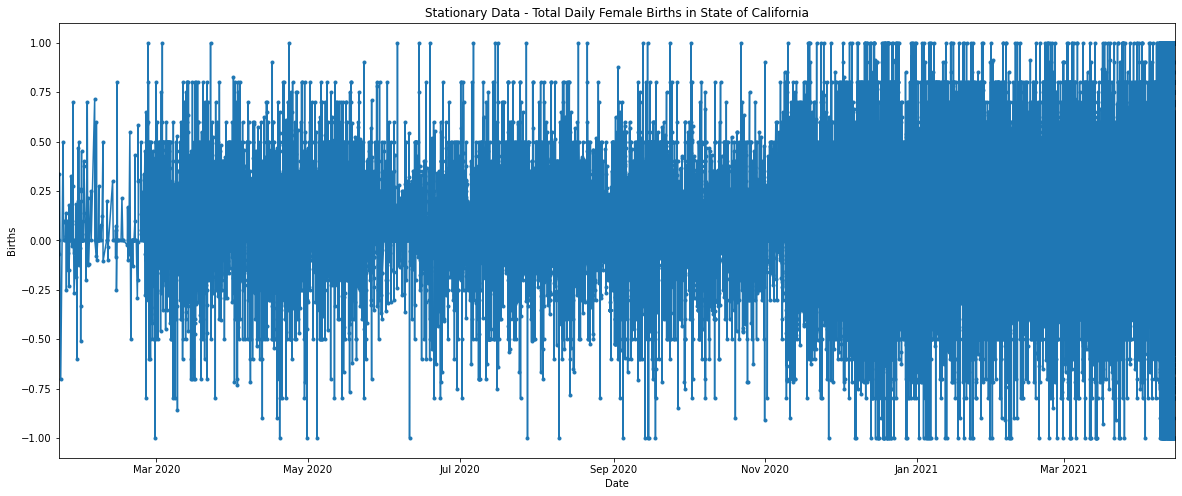

In [156]:
plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(new_df, marker='.')
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Stationary Data - Total Daily Female Births in State of California')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
plt.show()

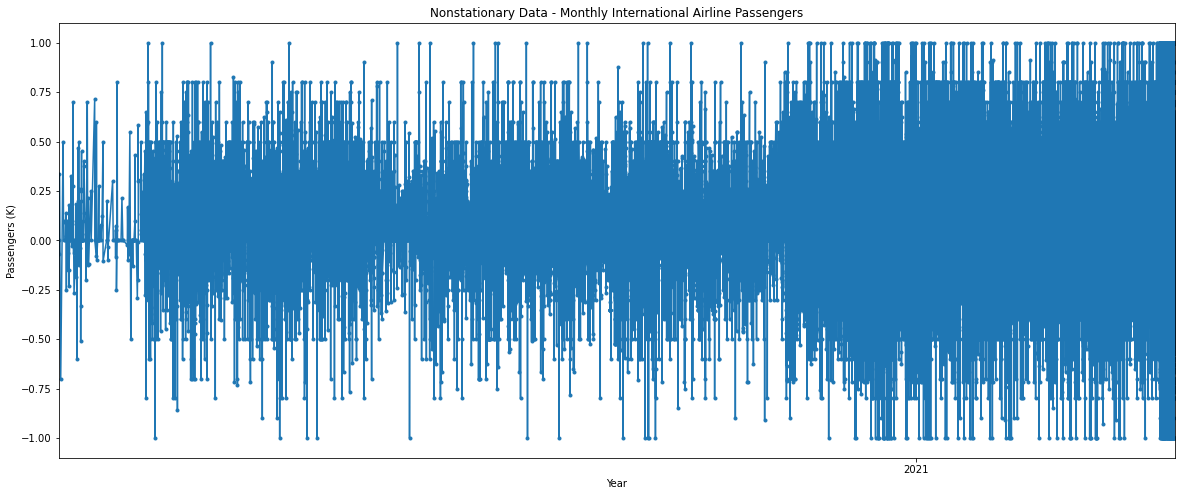

In [157]:
plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(new_df, marker='.')
plt.xlabel('Year')
plt.ylabel('Passengers (K)')
plt.title('Nonstationary Data - Monthly International Airline Passengers')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

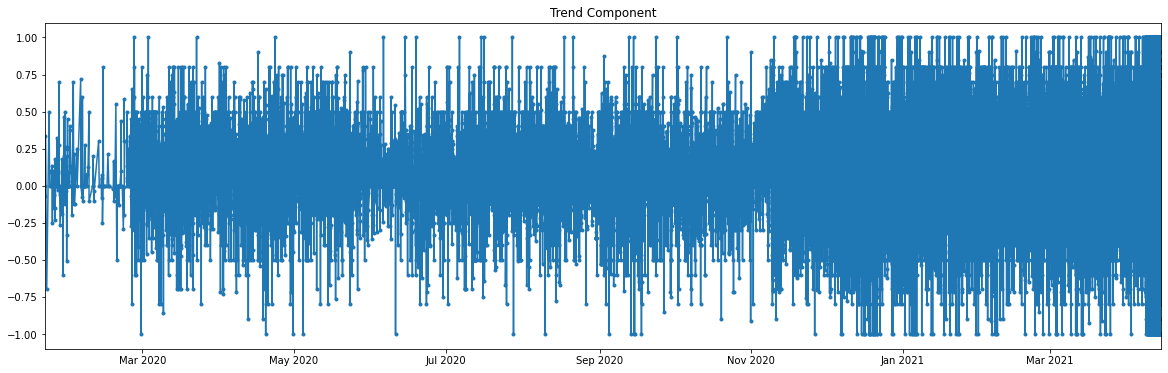

In [159]:
# Trend
plt.figure(figsize=(20,6))
ax = plt.gca()
plt.plot(new_df, marker='.')
plt.title('Trend Component')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
plt.show()

group by day, average sentiment

### Likes/Replies/Re-tweets change over time 

### Sentiment level change over time

## Text analysis 

### Vectorization

### Text Data Lecture: Topic modeling